# Data Project - Crypto Market Analysis 

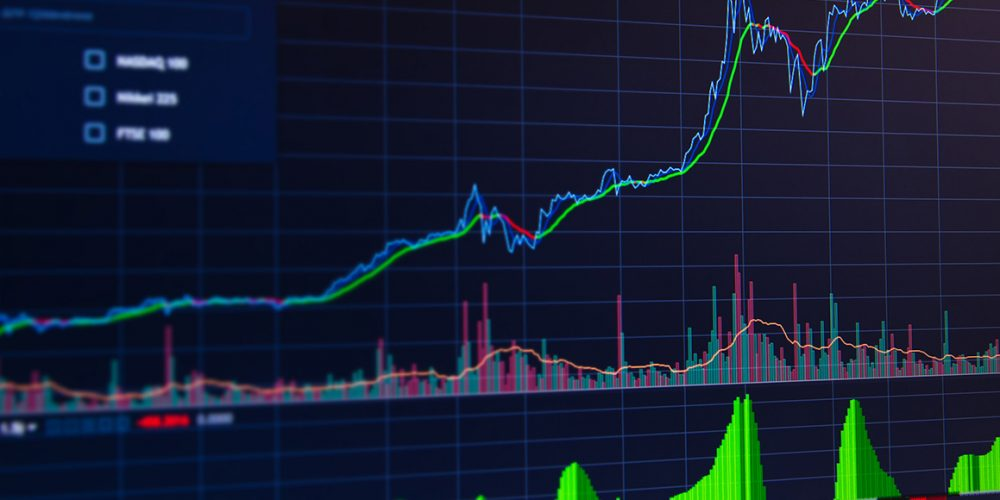

In this notebook we will be looking at data from the crypto market, particularly some popular cryptos. We will use pandas to get crypto information, visualize different aspects of it, and finally we will look at a few ways of analyzing the risk of a crypto, based on its previous performance history. We will also be predicting future crypto prices through a Long Short Term Memory (LSTM) method, as a preliminary trial in EDA.

We'll be answering the following questions along the way:

    1.) What was the change in price of the crypto over time?
    2.) What was the period (hourly) return of the crypto on average?
    3.) What was the moving average of the various cryptos?
    4.) What was the correlation between different cryptos?
    5.) How much value do we put at risk by investing in a particular crypto?   

# 1. What was the change in price of the crypto overtime?

In this section we'll go over how to handle requesting crypto information with pandas, and how to analyze basic attributes of a crypto.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading crypto data
from cmr.data_loader import load_market_data

In [2]:
# The cryptos we'll use for this analysis
crypto_list = ['btcusd', 'ethusd', 'xrpusd', 'eosusd']

# Set up End and Start times for data grab
start = pd.Timestamp(2021, 1, 1)
end = pd.Timestamp(2022, 1, 30)

# Grab data
md = load_market_data(crypto_list, start, end)
for crypto in crypto_list:
    globals()[crypto] = md.loc[(slice(None), crypto),].reset_index(level=1)

Quick note: Using globals() is a sloppy way of setting the DataFrame names, but its simple

Let's go ahead and play aorund with the DataFrame to get a feel for the data

In [3]:
crypto_list = [btcusd, ethusd, xrpusd, eosusd]
crypto_name = ["Bitcoin", "Ethereum", "Ripple", "EOS"]

df = md.reset_index(level=1)
df.tail(10)

,symbol,open,high,low,close,volume
time,,,,,,
2022-01-29 14:00:00,eosusd,2.3489,2.348900,2.3040,2.3092,22886.026151
2022-01-29 15:00:00,eosusd,2.3070,2.322800,2.2931,2.3074,47403.660279
2022-01-29 16:00:00,eosusd,2.3072,2.327200,2.2957,2.3264,9114.910769
2022-01-29 17:00:00,eosusd,2.3275,2.337833,2.3247,2.3312,5458.407028
2022-01-29 18:00:00,eosusd,2.3313,2.358600,2.3313,2.3549,11994.001955
2022-01-29 19:00:00,eosusd,2.3540,2.356200,2.3430,2.3430,6663.403227
2022-01-29 20:00:00,eosusd,2.3437,2.374400,2.3383,2.3550,60054.834107
2022-01-29 21:00:00,eosusd,2.3553,2.380000,2.3523,2.3534,10806.344244
2022-01-29 22:00:00,eosusd,2.3531,2.354102,2.3428,2.3448,3790.326996


In [4]:
# Summary Stats
btcusd.describe()

,open,high,low,close,volume
count,9456.000000,9456.000000,9456.000000,9456.000000,9456.000000
mean,46940.897181,47218.797307,46643.651034,46942.083873,358.182956
std,9619.548298,9622.468526,9615.996252,9618.198199,529.383160
min,28939.000000,29038.426155,28540.000000,29004.000000,0.000000
25%,38060.075004,38363.025444,37730.000000,38059.000000,110.919445
50%,47288.000000,47573.844983,47031.000000,47293.500000,206.186949
75%,55528.500000,55888.750000,55160.250000,55523.275496,401.975649
max,68601.000000,68958.000000,68450.000000,68601.000000,11111.599499


In [5]:
# General info
btcusd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9456 entries, 2021-01-01 00:00:00 to 2022-01-29 23:00:00
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   symbol  9456 non-null   object 
 1   open    9456 non-null   float64
 2   high    9456 non-null   float64
 3   low     9456 non-null   float64
 4   close   9456 non-null   float64
 5   volume  9456 non-null   float64
dtypes: float64(5), object(1)
memory usage: 517.1+ KB


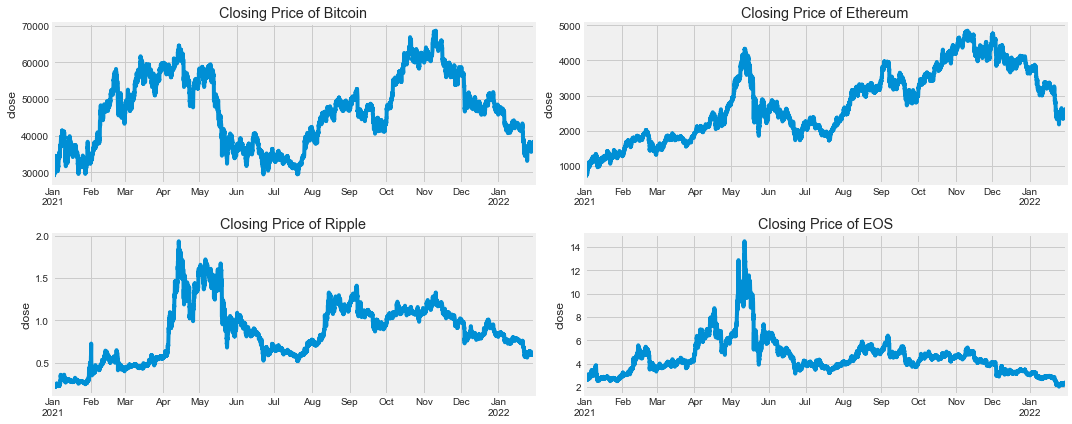

In [6]:
# Let's see a historical view of the closing price
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, crypto in enumerate(crypto_list, 1):
    plt.subplot(2, 2, i)
    crypto['close'].plot()
    plt.ylabel('close')
    plt.xlabel(None)
    plt.title(f"Closing Price of {crypto_name[i - 1]}")
    
plt.tight_layout()

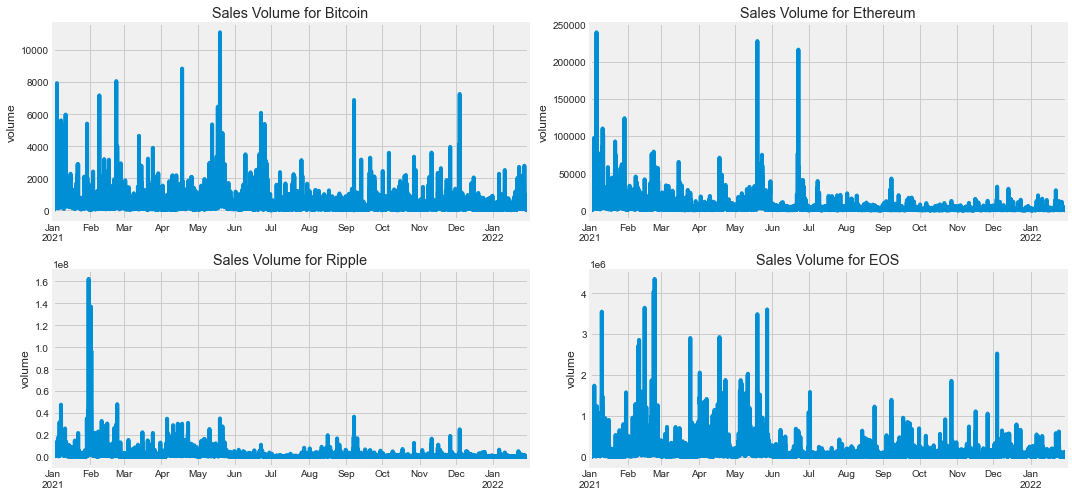

In [7]:
# Now let's plot the total volume of crypto being traded each hour
plt.figure(figsize=(15, 7))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, crypto in enumerate(crypto_list, 1):
    plt.subplot(2, 2, i)
    crypto['volume'].plot()
    plt.ylabel('volume')
    plt.xlabel(None)
    plt.title(f"Sales Volume for {crypto_name[i - 1]}")
    
plt.tight_layout()

Now that we've seen the visualizations for the closing price and the volume traded each period, let's go ahead and caculate the moving average for the crypto.

# 2. What was the moving average of the various cryptos?

In [8]:
ma_period = [10, 20, 50]

for ma in ma_period:
    for crypto in crypto_list:
        column_name = f"MA for {ma} days"
        crypto[column_name] = crypto['close'].rolling(ma * 24).mean()

Now let's go ahead and plot all the additional Moving Averages

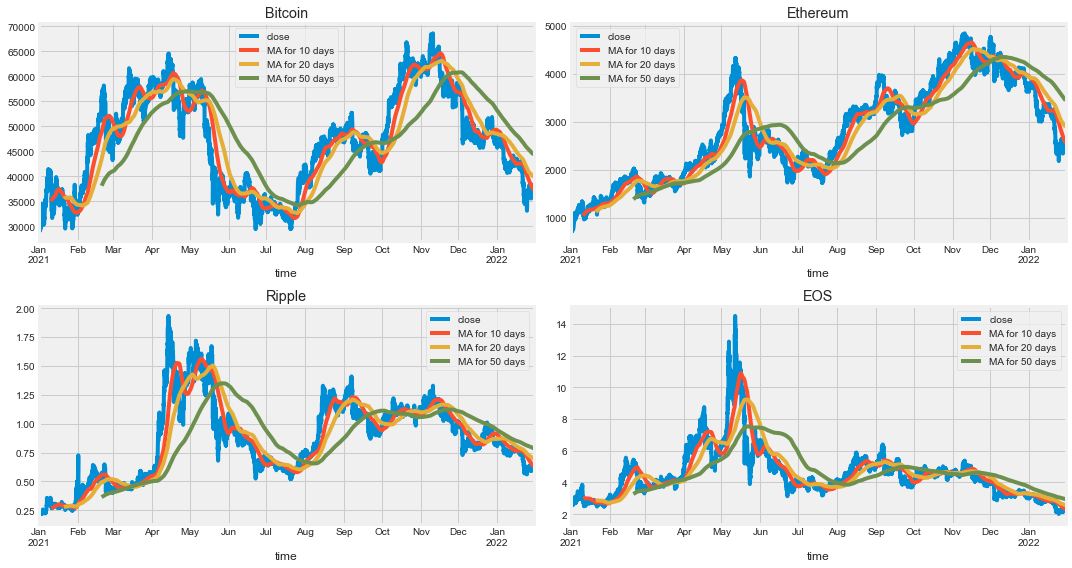

In [9]:
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

btcusd[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title(crypto_name[0])

ethusd[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title(crypto_name[1])

xrpusd[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title(crypto_name[2])

eosusd[['close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title(crypto_name[3])

fig.tight_layout()

# 3. What was the period (hourly) return of the crypto on average?

Now that we've done some baseline analysis, let's go ahead and dive a little deeper. We're now going to analyze the risk of the crypto. In order to do so we'll need to take a closer look at the changes of the crypto, and not just its absolute value. Let's go ahead and use pandas to retrieve the period returns for the BTCUSD crypto.

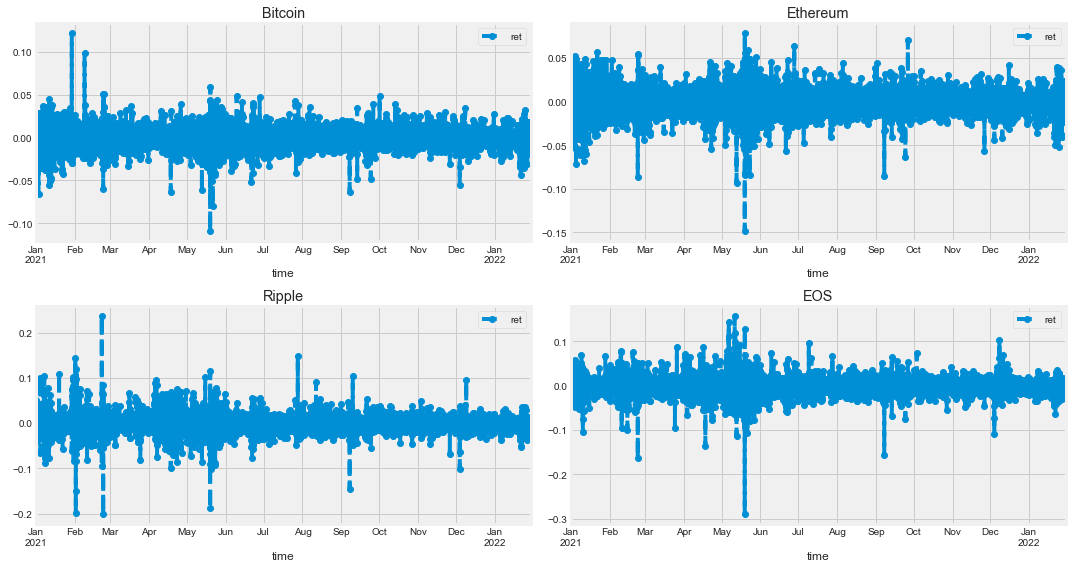

In [10]:
# We'll use pct_change to find the percent change for each period
for crypto in crypto_list:
    crypto['ret'] = crypto['close'].pct_change()

# Then we'll plot the return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(8)
fig.set_figwidth(15)

btcusd['ret'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title(crypto_name[0])

ethusd['ret'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title(crypto_name[1])

xrpusd['ret'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title(crypto_name[2])

eosusd['ret'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title(crypto_name[3])

fig.tight_layout()

Great, now let's get an overall look at the average return using a histogram. We'll use seaborn to create both a histogram and kde plot on the same figure.

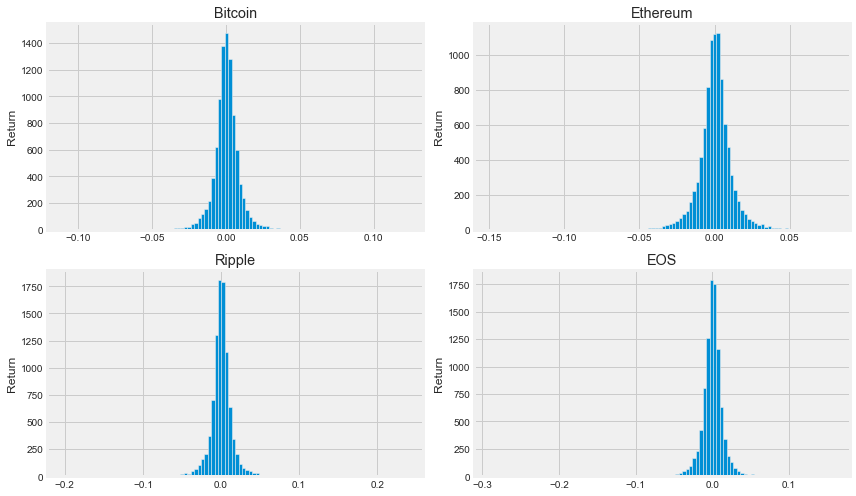

In [11]:
plt.figure(figsize=(12, 7))

for i, crypto in enumerate(crypto_list, 1):
    plt.subplot(2, 2, i)
    crypto['ret'].hist(bins=100)
    plt.ylabel('Return')
    plt.title(f'{crypto_name[i - 1]}')
    
plt.tight_layout()

# 4. What was the correlation between different cryptos closing prices?

Now what if we wanted to analyze the returns of all the cryptos in our list? Let's go ahead and build a DataFrame with all the ['close'] columns for each of the cryptos dataframes.

In [12]:
# Grab all the closing prices for the crypto list into one DataFrame
closing_df = md['close'].unstack()

# Let's take a quick look
closing_df.head() 

symbol,btcusd,eosusd,ethusd,xrpusd
time,,,,
2021-01-01 00:00:00,29008.000000,2.603800,734.170000,0.22186
2021-01-01 01:00:00,29426.000000,2.631500,748.970000,0.22365
2021-01-01 02:00:00,29205.000000,2.632293,744.349766,0.22391
2021-01-01 03:00:00,29313.498848,2.637700,745.740000,0.22754
2021-01-01 04:00:00,29239.000000,2.639200,743.024898,0.23905


Now that we have all the closing prices, let's go ahead and get the return for all the cryptos, like we did for the Bitcoin.

In [13]:
# Make a new returns DataFrame
crypto_rets = closing_df.pct_change()
crypto_rets.head()

symbol,btcusd,eosusd,ethusd,xrpusd
time,,,,
2021-01-01 00:00:00,NaN,NaN,NaN,NaN
2021-01-01 01:00:00,0.014410,0.010638,0.020159,0.008068
2021-01-01 02:00:00,-0.007510,0.000301,-0.006169,0.001163
2021-01-01 03:00:00,0.003715,0.002054,0.001868,0.016212
2021-01-01 04:00:00,-0.002541,0.000569,-0.003641,0.050585


Now we can compare the percentage return of two cryptos to check how correlated. First let's see a crypto compared to itself.

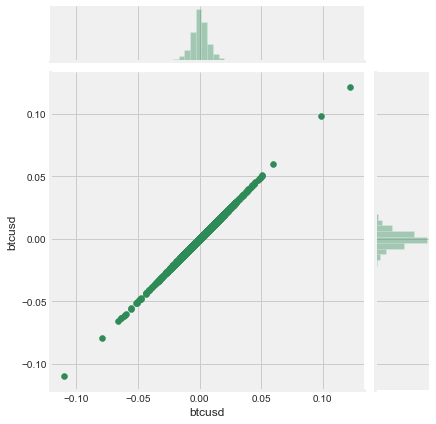

In [14]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='btcusd', y='btcusd', data=crypto_rets, kind='scatter', color='seagreen')

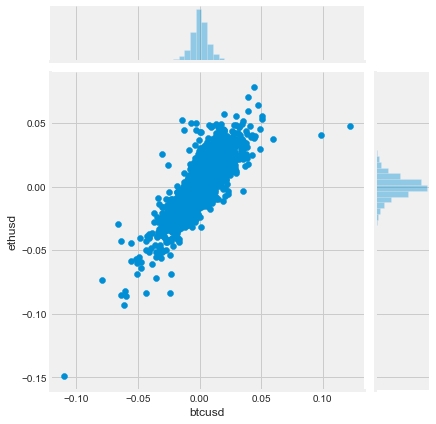

In [15]:
# We'll use joinplot to compare the returns of Bitcoin and Ethereum
sns.jointplot(x='btcusd', y='ethusd', data=crypto_rets, kind='scatter')

So now we can see that if two cryptos are perfectly (and positivley) correlated with each other a linear relationship bewteen its return values should occur. 

Seaborn and pandas make it very easy to repeat this comparison analysis for every possible combination of cryptos in our crypto ticker list. We can use sns.pairplot() to automatically create this plot

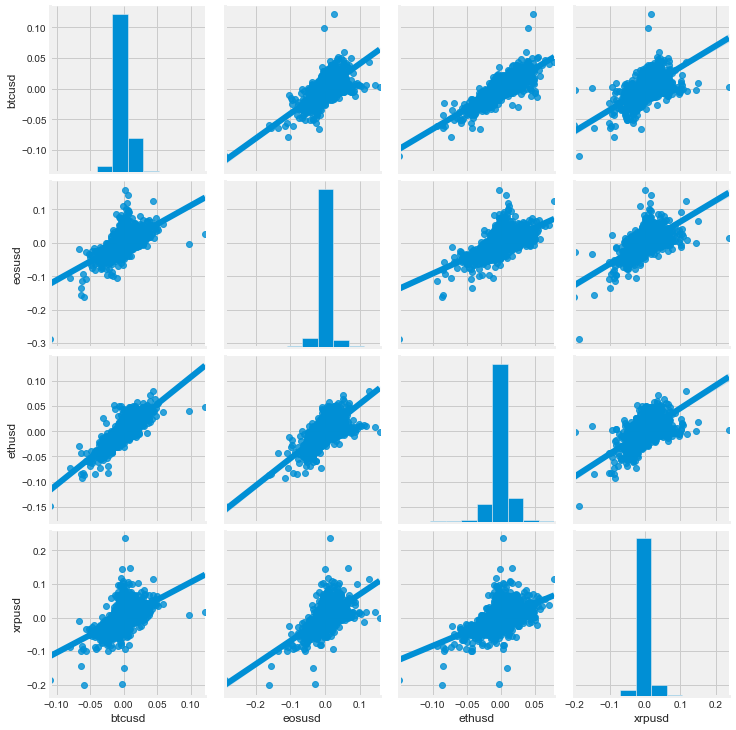

In [16]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis 
# of all the comparisons

sns.pairplot(crypto_rets, kind='reg')

Above we can see all the relationships on returns between all the cryptos. It might be interesting to investigate that individual comparison. While the simplicity of just calling sns.pairplot() is fantastic we can also use sns.PairGrid() for full control of the figure, including what kind of plots go in the diagonal, the upper triangle, and the lower triangle. Below is an example of utilizing the full power of seaborn to achieve this result.

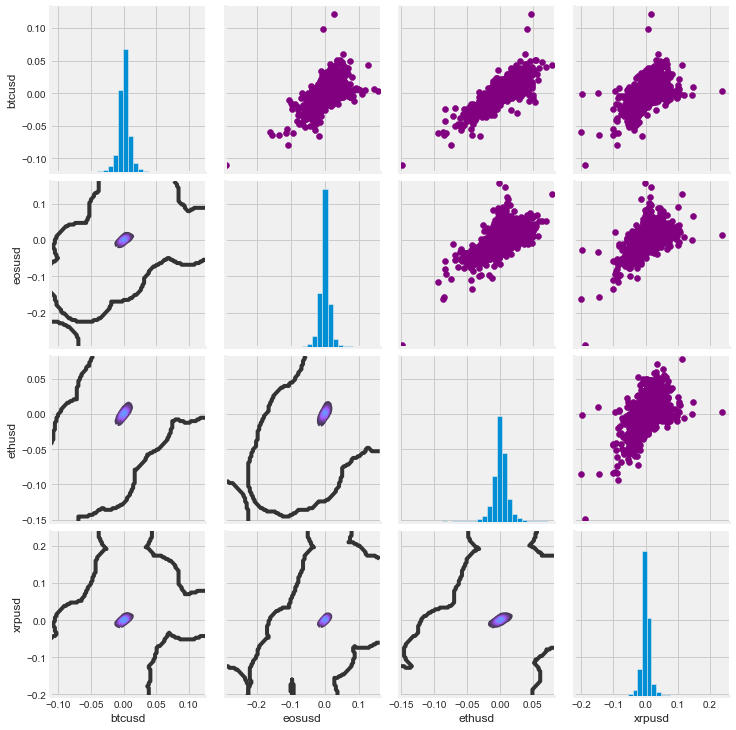

In [17]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(crypto_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) 
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the return
return_fig.map_diag(plt.hist, bins=30)

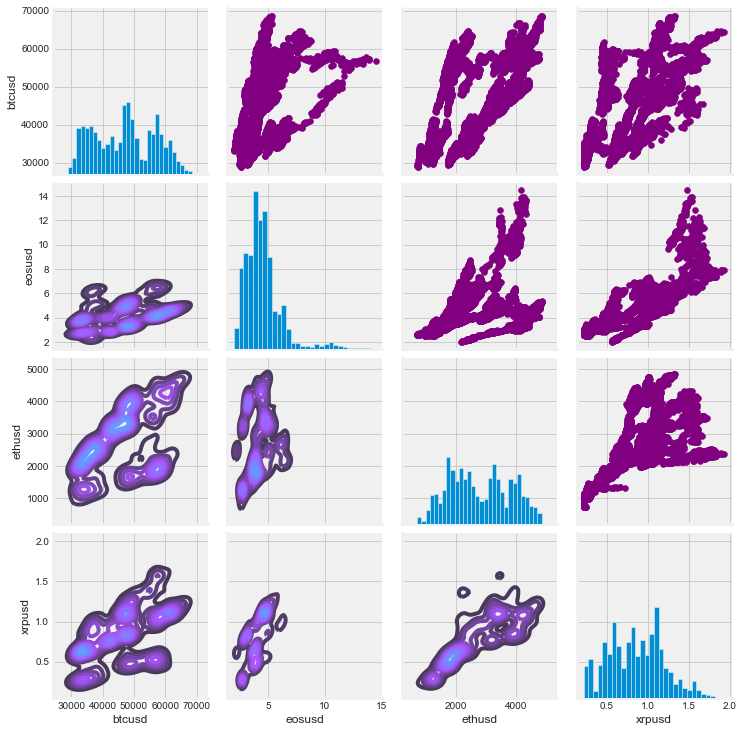

In [18]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the return
returns_fig.map_diag(plt.hist,bins=30)

Finally, we could also do a correlation plot, to get actual numerical values for the correlation between the cryptos' return values. By comparing the closing prices, we see an interesting relationship between Bitcoin and Ethereum.

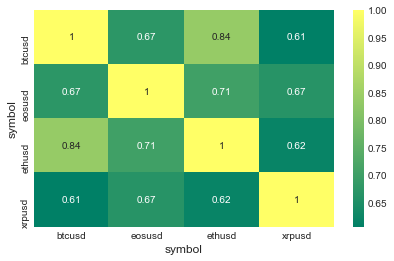

In [19]:
# Let's go ahead and use sebron for a quick correlation plot for the returns
sns.heatmap(crypto_rets.corr(), annot=True, cmap='summer')

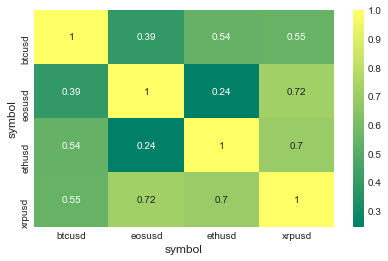

In [20]:
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

Just like we suspected in our PairPlot we see here numerically and visually that Bitcoin and Ethereum had the strongest correlation of crypto return. It's also interesting to see that all the cryptos are positively correlated.

# 5. How much value do we put at risk by investing in a particular crypto?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on percentage returns is by comparing the expected return with the standard deviation of the returns.

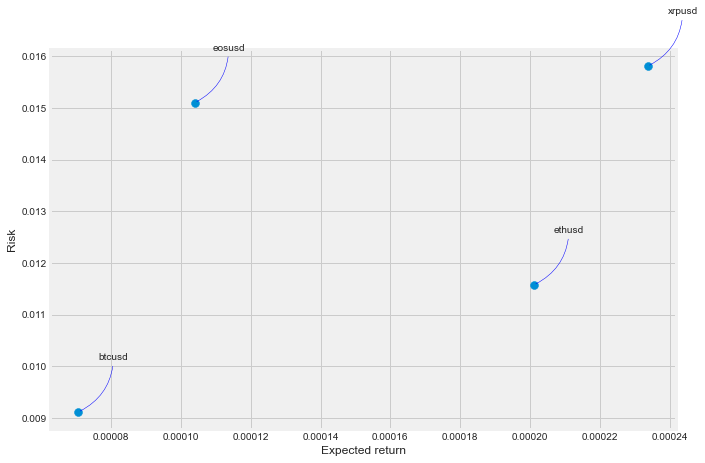

In [21]:
# Let's start by defining a new DataFrame as a clenaed version of the oriignal crypto_rets DataFrame
rets = crypto_rets.dropna()

area = np.pi * 20

plt.figure(figsize=(10, 7))
plt.scatter(rets.mean(), rets.std(), s=area)
plt.xlabel('Expected return')
plt.ylabel('Risk')

for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom', 
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))